In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm
from display import Disp

font_path = '/Users/dev/Fonts/Noto_Sans_KR/NotoSansKR-Regular.otf'
k_prop = mfm.FontProperties(fname=font_path)
plt.style.use('dark_background')

# Display handler with some nice helpers
disp = Disp(display)
# disp.code('display.py', label='display.py ')


## Generate Features from PRAAT TextGrid

In [2]:
transcript_file = 'data/korean-single-speaker/transcript.v.1.4.txt'
tr_df = pd.read_csv(transcript_file, sep="|", names=["audio_file", "tr_w_num", "tr_syl", "tr_char", "dur", "en"])


Inspecting the transcript there are 3 different transcriptions.

| <!-- -->    | <!-- -->    |
|-------------|-------------|
|tr_w_num|Keeps numerics in number form|
|tr_syl|String encoding is syllable by syllable|
|tr_char|String encoding is character by character|



In [3]:
# Since we are not interested in numerics as numbers, we drop that column
tr_df = tr_df.drop(columns=['tr_w_num'])
tr_df

,audio_file,tr_syl,tr_char,dur,en
0,1/1_0000.wav,그는 괜찮은 척하려고 애쓰는 것 같았다.,그는 괜찮은 척하려고 애쓰는 것 같았다.,3.5,He seemed to be pretending to be okay.
1,1/1_0001.wav,그녀의 사랑을 얻기 위해 애썼지만 헛수고였다.,그녀의 사랑을 얻기 위해 애썼지만 헛수고ᄋ...,4.0,I tried in vain to win her love.
2,1/1_0002.wav,용돈을 아껴 써라.,용돈을 아껴 써라.,1.8,Save your pocket money.
3,1/1_0003.wav,그는 아내를 많이 아낀다.,그는 아내를 많이 아낀다.,2.3,He cherishes his wife.
4,1/1_0004.wav,그 애 전화번호 알아?,그 애 전화번호 알아?,1.3,Do you know his number?
...,...,...,...,...,...
12849,4/4_5627.wav,깨진 유리 조각에 손가락을 벴어요.,깨진 유리 조각에 손가락을 벴어요.,3.9,I cut my finger on a piece of broken glass.
12850,4/4_5628.wav,아드님이 친구들과 야구를 하다 유리창을 깼어요.,아드님이 친구들과 야구를 하다 유리창을 ᄁ...,5.4,Your son was playing baseball with his friends...
12851,4/4_5629.wav,일찍 신청하는 사람이 유리할 거야.,일찍 신청하는 사람이 유리할 거야.,3.7,Early applicants will be given advantages.
12852,4/4_5630.wav,이 두 소설은 줄거리가 유사해요.,이 두 소설은 줄거리가 유사해요.,3.5,These two novels are much alike in their synop...


## Audio Analysis

Informational:
* Consonant Phonemes duration 25-50 msec
* Vowel Phonemes duration 50-100+ msec


In [4]:
# /kaggle/input/korean-single-speaker-speech-dataset/transcript.v.1.4.txt
# /kaggle/input/korean-single-speaker-speech-dataset/kss/1/1_0845.wav (example)

# from comet_ml import Experiment
import librosa
import librosa.display
from scipy.io import wavfile as wav
import IPython

In [5]:
import textgrid

from kss_textgrid import KssTextGrid
# TODO: Refactor to use KssDf
# from kss_chunk import KssChunk, KssChunkType

# (self, df, kss_id, type, base_dir=None):

In [6]:
tg_dir = 'data/korean-single-speaker/kss/1'
kss_id = '1_0004'
# chunk_dir = 'data/korean-single-speaker/kss_chunks'
# chunk_char_path = f'{chunk_dir}/chunk_char.csv'
# chunk_syl_path = f'{chunk_dir}/chunk_syl.csv'
tg = KssTextGrid(kss_id, tg_dir)
kss_char = KssChunk(tg.chars_df(), kss_id, KssChunkType.CHAR)
kss_syl = KssChunk(tg.syls_df(), kss_id, KssChunkType.SYL)
disp.obj(kss_char.df, label=f'KSS {kss_id} Character Dataframe')
disp.obj(kss_syl.df, label=f'KSS {kss_id} Syllable Dataframe')

KSS 1_0004 Character Dataframe

,char,start,stop,audio
0,0,0.00000,0.09288,data/korean-single-speaker/kss/1/1_0004.wav
1,ᄀ,0.09288,0.14314,data/korean-single-speaker/kss/1/1_0004.wav
2,ᅳ,0.14314,0.24152,data/korean-single-speaker/kss/1/1_0004.wav
3,애,0.24152,0.33572,data/korean-single-speaker/kss/1/1_0004.wav
4,0,0.33572,0.35846,data/korean-single-speaker/kss/1/1_0004.wav
5,ᄌ,0.35846,0.41761,data/korean-single-speaker/kss/1/1_0004.wav
6,ᅥ,0.41761,0.51689,data/korean-single-speaker/kss/1/1_0004.wav
7,ᆫ,0.51689,0.56929,data/korean-single-speaker/kss/1/1_0004.wav
8,~ᆫ화,0.56929,0.67854,data/korean-single-speaker/kss/1/1_0004.wav
9,ᄇ,0.67854,0.71058,data/korean-single-speaker/kss/1/1_0004.wav


KSS 1_0004 Syllable Dataframe

,syl,start,stop,audio
0,0,0.00000,0.09288,data/korean-single-speaker/kss/1/1_0004.wav
1,그,0.09288,0.24152,data/korean-single-speaker/kss/1/1_0004.wav
2,애,0.24152,0.33564,data/korean-single-speaker/kss/1/1_0004.wav
3,0,0.33564,0.35846,data/korean-single-speaker/kss/1/1_0004.wav
4,전,0.35846,0.56929,data/korean-single-speaker/kss/1/1_0004.wav
5,~ᆫ화,0.56929,0.67854,data/korean-single-speaker/kss/1/1_0004.wav
6,번,0.67854,0.84911,data/korean-single-speaker/kss/1/1_0004.wav
7,~ᆫ호,0.84911,0.89335,data/korean-single-speaker/kss/1/1_0004.wav
8,알,0.89335,1.07737,data/korean-single-speaker/kss/1/1_0004.wav
9,아?,1.07737,1.27282,data/korean-single-speaker/kss/1/1_0004.wav


## Statistics

In [7]:
disp.obj((kss_syl.df['stop'] - kss_syl.df['start']).describe(), 'Interval Statistics (using describe)')

Interval Statistics (using describe)

count    11.000000
mean      0.121091
std       0.064660
min       0.022820
25%       0.076030
50%       0.109250
75%       0.177295
max       0.210830
dtype: float64

In [8]:

# WRITE to CSV
kss_char.save()
kss_syl.save()


KssChunk[INFO]: Saving: data/korean-single-speaker/kss_chunks/1_0004_char.csv
KssChunk[INFO]: Saving: data/korean-single-speaker/kss_chunks/1_0004_syl.csv


<ipython-input-9-51baf0cd5f5a>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), fontproperties=k_prop, rotation=90, **kwargs)
/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/Users/dev/Projects/korean-ml/venv/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


Character Interval Dataframe

,char,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,ᄀ,0.14298,0.17326,data/korean-single-speaker/kss/1/1_0000.wav
2,ᅳ,0.17326,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
3,ᆫ,0.25143,0.30110,data/korean-single-speaker/kss/1/1_0000.wav
4,ᅳ,0.30110,0.39456,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
12,아,0.91879,1.07637,data/korean-single-speaker/kss/1/1_0005.wav
13,ᄉ,1.07637,1.18436,data/korean-single-speaker/kss/1/1_0005.wav
14,ᅦ,1.18436,1.28889,data/korean-single-speaker/kss/1/1_0005.wav
15,요?,1.28889,1.44689,data/korean-single-speaker/kss/1/1_0005.wav


Audio Files

array(['data/korean-single-speaker/kss/1/1_0000.wav',
       'data/korean-single-speaker/kss/1/1_0001.wav',
       'data/korean-single-speaker/kss/1/1_0002.wav',
       'data/korean-single-speaker/kss/1/1_0003.wav',
       'data/korean-single-speaker/kss/1/1_0004.wav',
       'data/korean-single-speaker/kss/1/1_0005.wav'], dtype=object)

Syllable Interval Dataframe

,syl,start,stop,audio
0,0,0.00000,0.14298,data/korean-single-speaker/kss/1/1_0000.wav
1,그,0.14298,0.25143,data/korean-single-speaker/kss/1/1_0000.wav
2,는,0.25143,0.49473,data/korean-single-speaker/kss/1/1_0000.wav
3,0,0.49473,0.52397,data/korean-single-speaker/kss/1/1_0000.wav
4,괜,0.52397,0.71846,data/korean-single-speaker/kss/1/1_0000.wav
...,...,...,...,...
7,잘,0.67573,0.91961,data/korean-single-speaker/kss/1/1_0005.wav
8,아,0.91961,1.07637,data/korean-single-speaker/kss/1/1_0005.wav
9,세,1.07637,1.28889,data/korean-single-speaker/kss/1/1_0005.wav
10,요?,1.28889,1.44689,data/korean-single-speaker/kss/1/1_0005.wav


Audio Files

array(['data/korean-single-speaker/kss/1/1_0000.wav',
       'data/korean-single-speaker/kss/1/1_0001.wav',
       'data/korean-single-speaker/kss/1/1_0002.wav',
       'data/korean-single-speaker/kss/1/1_0003.wav',
       'data/korean-single-speaker/kss/1/1_0004.wav',
       'data/korean-single-speaker/kss/1/1_0005.wav'], dtype=object)

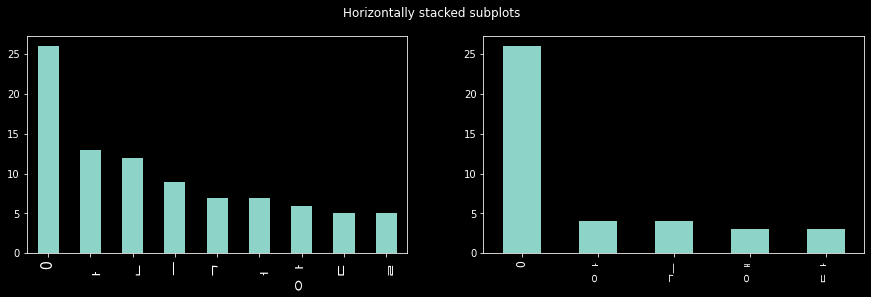

In [9]:
chunk_dir = 'data/korean-single-speaker/kss_chunks'

def k_ax(ax, **kwargs):
    ax.set_xticklabels(ax.get_xticklabels(), fontproperties=k_prop, rotation=90, **kwargs)

def filter_counts(df, val):
    counts = df.value_counts()
    return counts[counts>val]


all_chunk_char_df, all_chunk_syl_df = KssChunk.load_all()

# Plot histogram of characters and syllables
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))
fig.suptitle('Horizontally stacked subplots')
k_ax(ax1, size=16)
k_ax(ax2, size=12)
filter_counts(all_chunk_char_df['char'], 4).plot(kind='bar', ax=ax1)
filter_counts(all_chunk_syl_df['syl'], 2).plot(kind='bar', ax=ax2)
disp.obj(all_chunk_char_df, 'Character Interval Dataframe')
disp.obj(all_chunk_char_df['audio'].unique(), 'Audio Files')
disp.obj(all_chunk_syl_df, 'Syllable Interval Dataframe')
disp.obj(all_chunk_syl_df['audio'].unique(), 'Audio Files')